In [50]:
import pandas as pd
import matplotlib.pyplot as plt

FL_filepath = '/Users/ramanzatsarenko/smores_proj/out/Fl_100epochs_10runs_2025-10-29_11-25-06/MARE_stats.csv'

def plot(file, learning_type):
    df = pd.read_csv(file)
    plt.figure(figsize=(10, 5))
    plt.bar(df['dataset'], df['mean'], color=['#1f77b4' if 'fl' in d else '#ff7f0e' for d in df['dataset']])
    plt.title(f'{learning_type} LEARNING: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('MARE')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

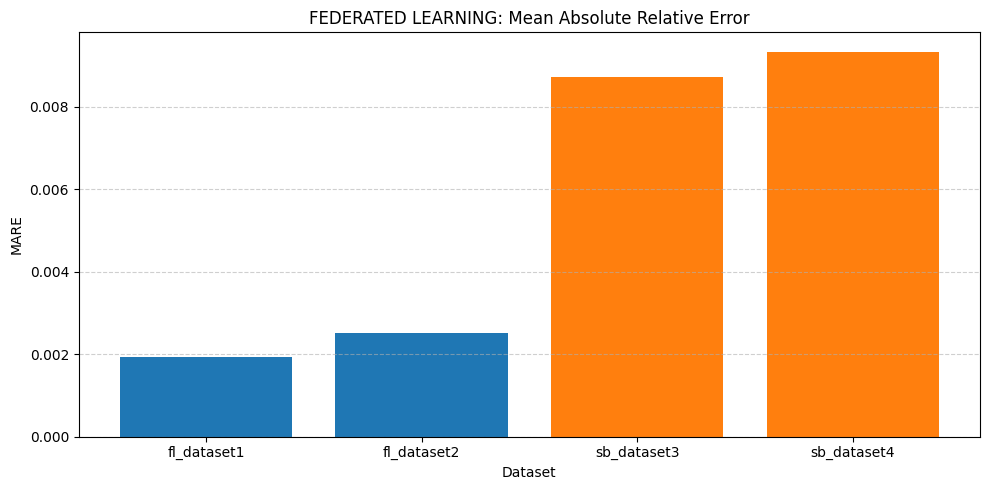

In [51]:
plot(FL_filepath, 'FEDERATED')

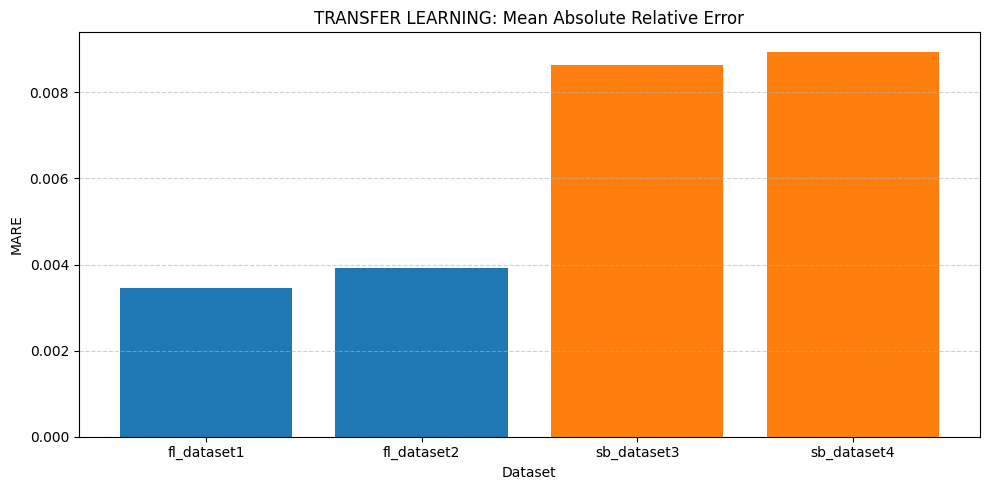

In [52]:
TL_filepath = '/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-10-29_11-31-47/MARE_stats.csv'
plot(TL_filepath, 'TRANSFER')

In [53]:
CT_filepath = '/Users/ramanzatsarenko/smores_proj/out/crossval_SB_FL_100epochs_1runs_2025-10-29_12-53-19/MARE_stats.csv'
TL_filepath = '/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-10-29_11-31-47/MARE_stats.csv'
import numpy as np

def plot(file1, file2, learning_type, model):
    df = pd.read_csv(file1)
    df = df.loc[df['model'] == model]
    df2 = pd.read_csv(file2)
    df2 = df2[df2['dataset'].isin(['fl_dataset1', 'fl_dataset2'])]
    # x = np.arange(len(df['dataset']))
    width = 0.2
    plt.figure(figsize=(10, 5))
    plt.bar(df['dataset'], df['mean'], color='#1f77b4')
    plt.bar(['florida_dataset1', 'florida_dataset2'], df2['mean'], color="#ff7700ff")
    plt.title(f'{learning_type}, {model}: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('MARE')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

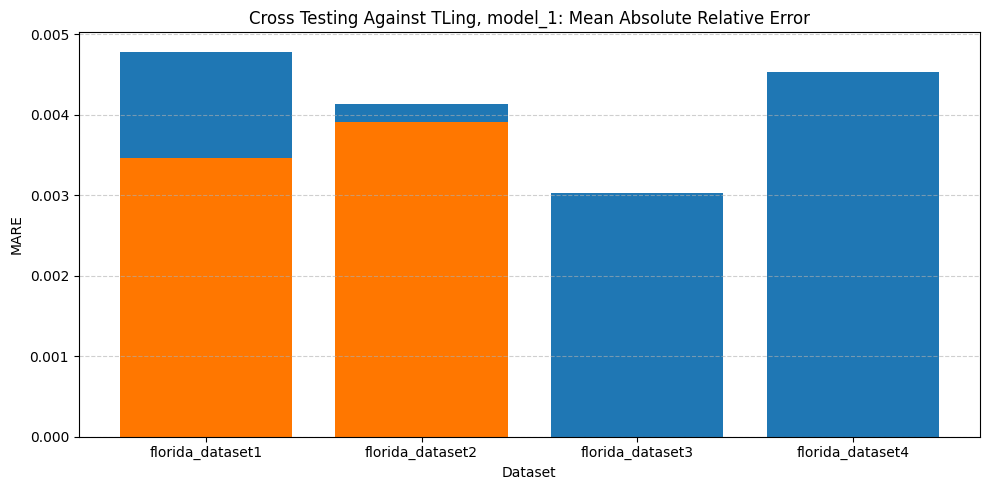

In [54]:
plot(CT_filepath, TL_filepath, 'Cross Testing Against TLing', 'model_1')

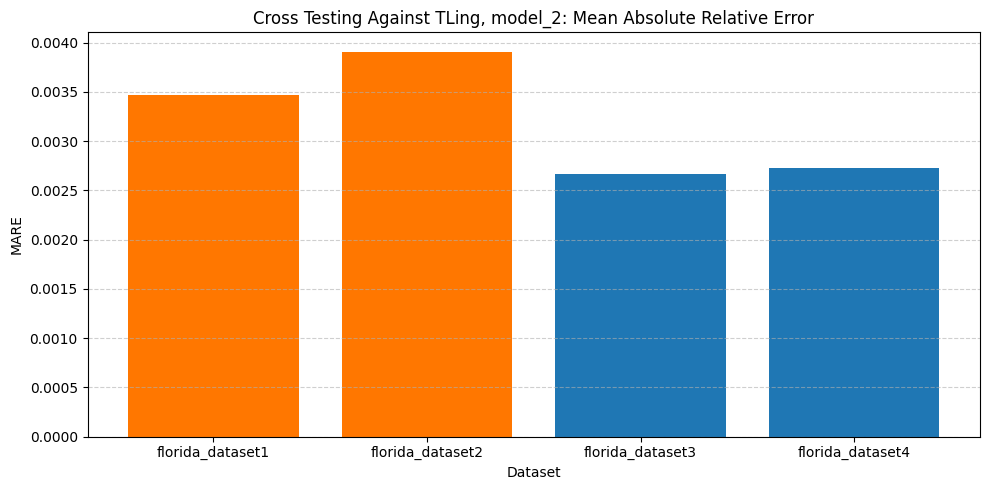

In [55]:
plot(CT_filepath, TL_filepath, 'Cross Testing Against TLing', 'model_2')

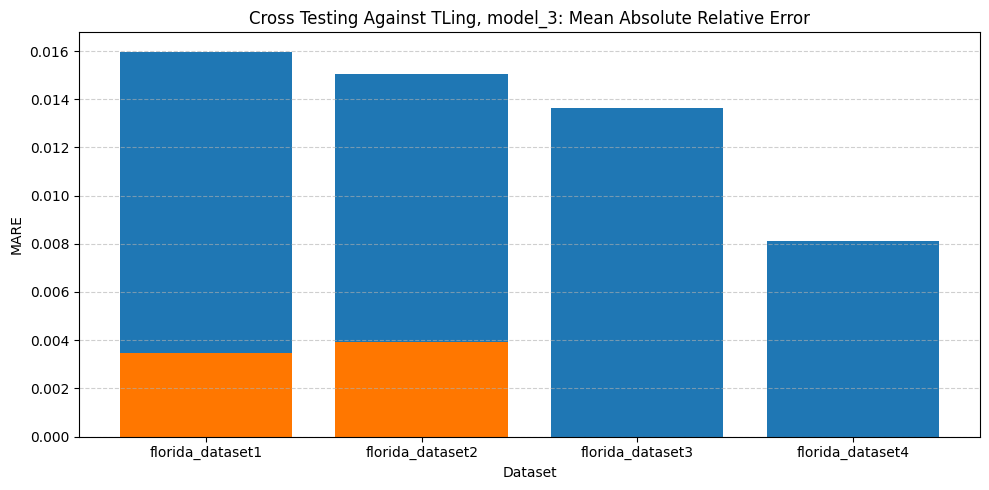

In [56]:
plot(CT_filepath, TL_filepath, 'Cross Testing Against TLing', 'model_3')

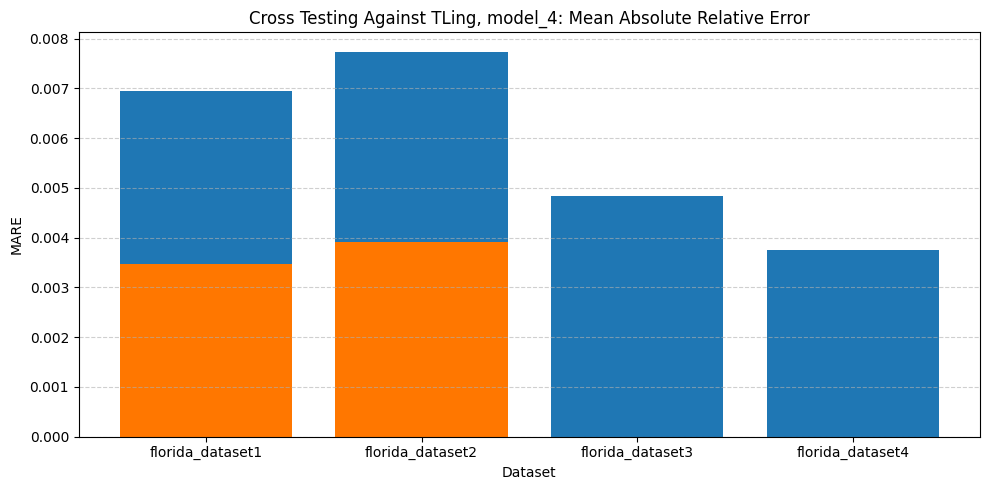

In [57]:
plot(CT_filepath, TL_filepath, 'Cross Testing Against TLing', 'model_4')

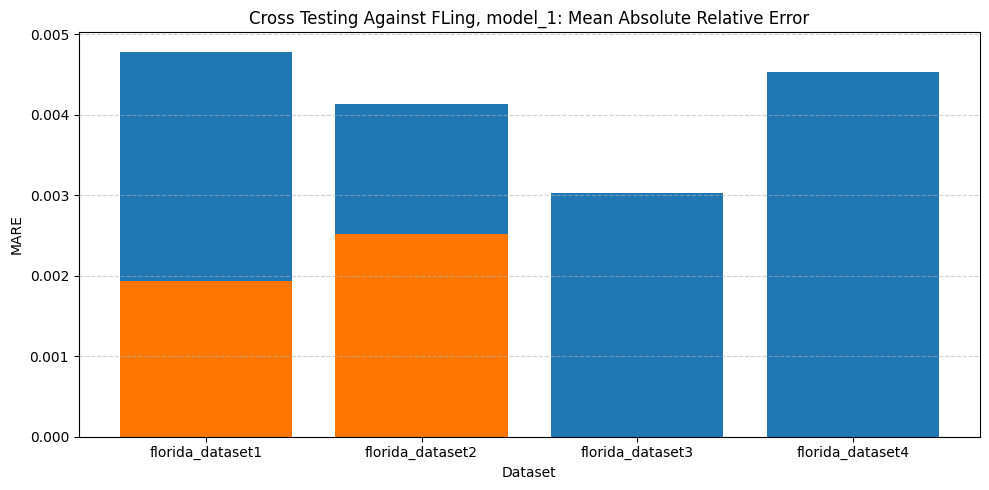

In [58]:
plot(CT_filepath, FL_filepath, 'Cross Testing Against FLing', 'model_1')

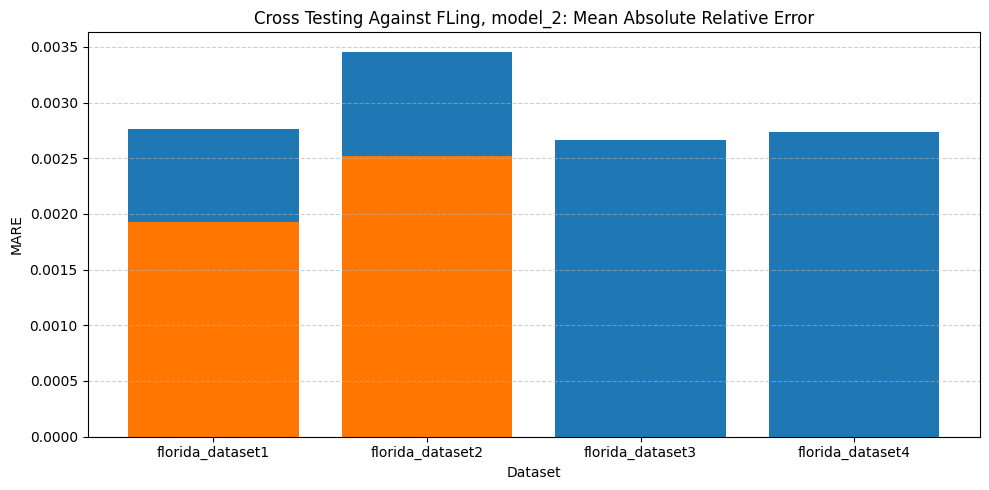

In [59]:
plot(CT_filepath, FL_filepath, 'Cross Testing Against FLing', 'model_2')

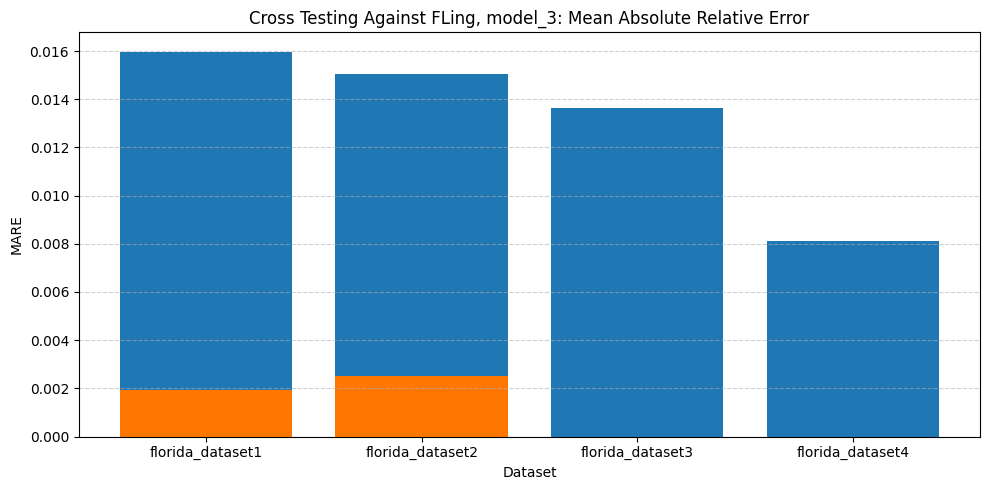

In [60]:
plot(CT_filepath, FL_filepath, 'Cross Testing Against FLing', 'model_3')

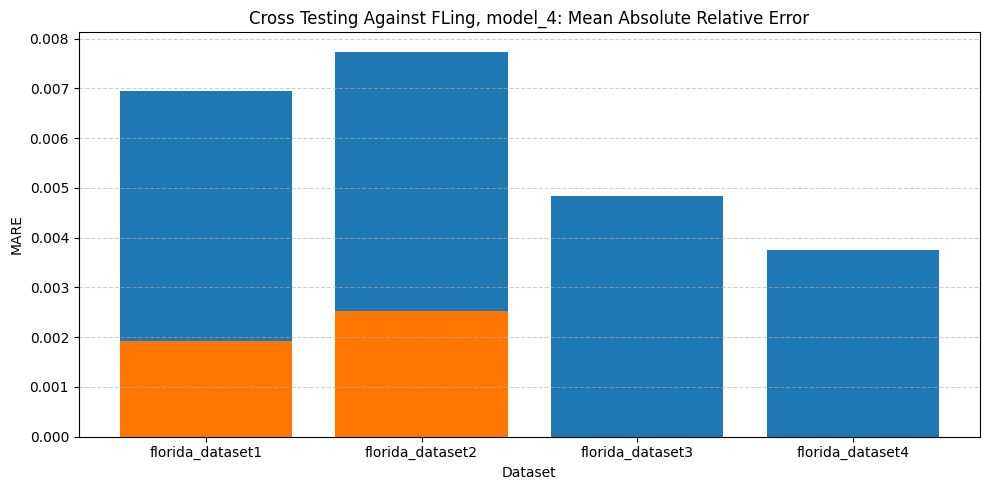

In [61]:
plot(CT_filepath, FL_filepath, 'Cross Testing Against FLing', 'model_4')

In [62]:
import numpy as np

def plot_FL_TL(file1, file2, learning_type):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    x = np.arange(len(df1['dataset'].unique()))
    offset = 0.2
    plt.figure(figsize=(10, 5))
    plt.bar(x - offset/2, df1['mean'], color='#1f77b4', label='TL')
    plt.bar(x + offset/2, df2['mean'], color="#ff8000", label='FL')
    plt.title(f'{learning_type} LEARNING: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('MARE')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

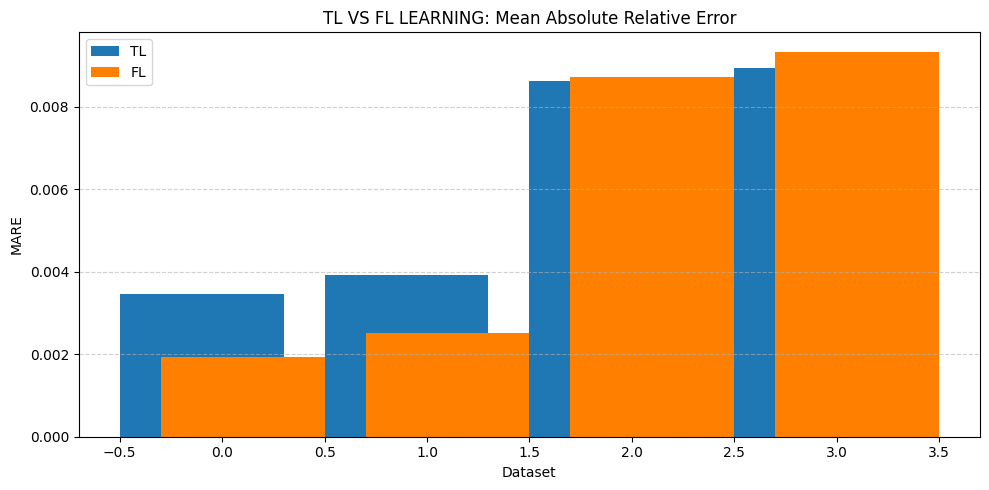

In [63]:
plot_FL_TL(TL_filepath, FL_filepath, learning_type='TL VS FL')

In [64]:
import numpy as np
file='/Users/ramanzatsarenko/smores_proj/out/crossval_100epochs_10runs_2025-11-05_16-33-51/metrics.csv'
def plot_losses_w_baselines(file1, learning_type, model):
    df1 = pd.read_csv(file1)
    df1 = df1.loc[df1['model'] == model]
    x = np.arange(len(df1['dataset'].unique()))
    offset = 0.2
    plt.figure(figsize=(10, 5))
    plt.bar(x - offset/2, df1['MARE'], color='#1f77b4', label='LSTM')
    plt.bar(x + offset/2, df1['MARE_baseline'], color="#ff8000", label='Rolling AVG')
    plt.title(f'{learning_type} LEARNING: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('MARE')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

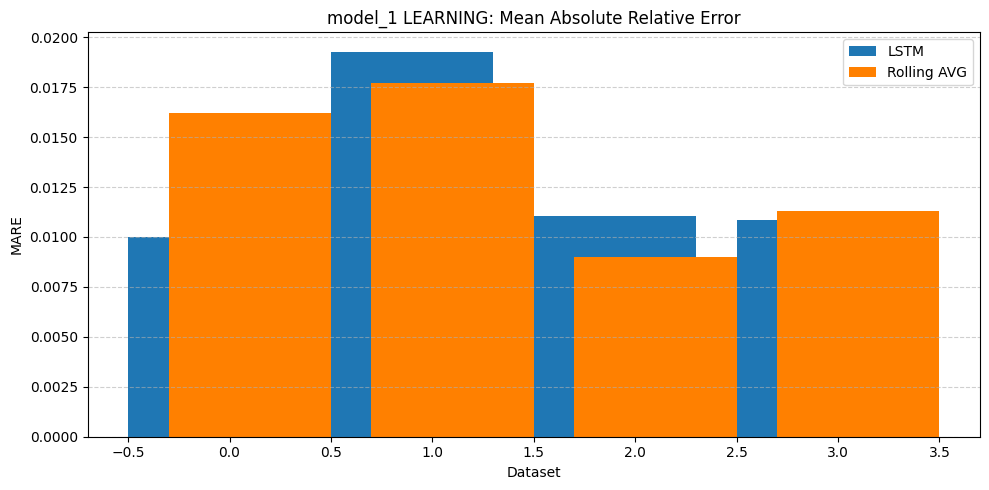

In [65]:
plot_losses_w_baselines(file, 'model_1', 'model_1')

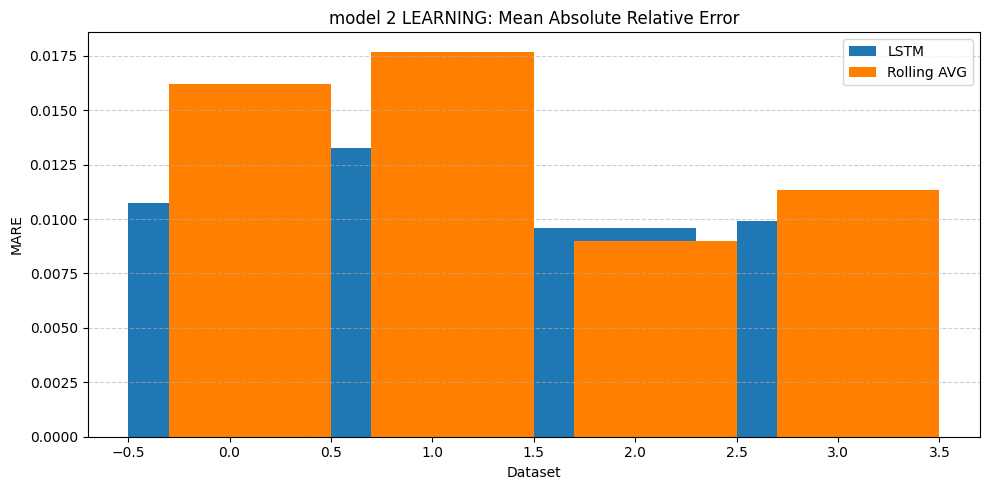

In [66]:
plot_losses_w_baselines(file, 'model 2', 'model_2')

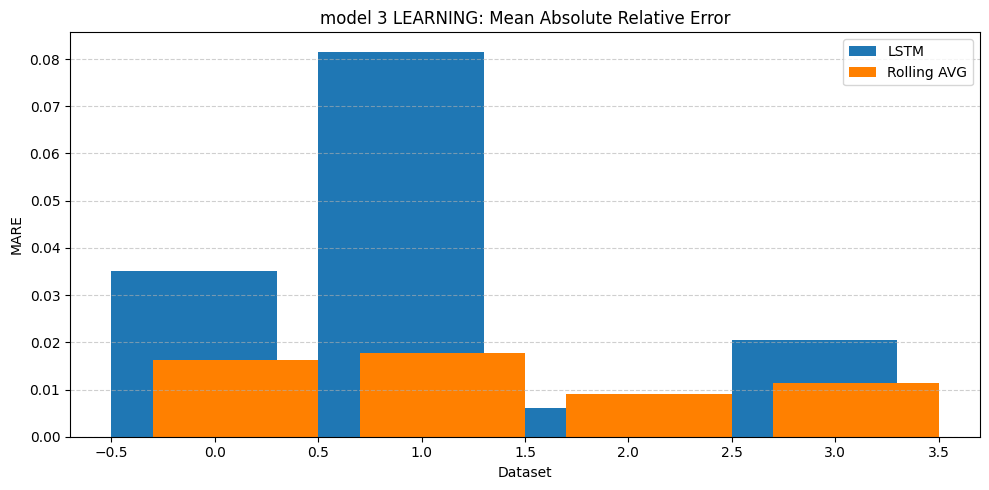

In [67]:
plot_losses_w_baselines(file, 'model 3', 'model_3')

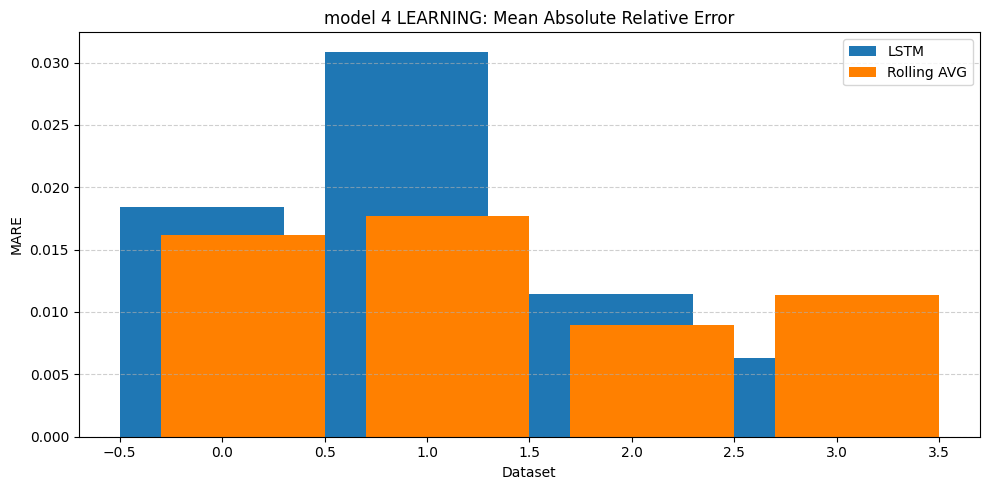

In [68]:
plot_losses_w_baselines(file, 'model 4', 'model_4')

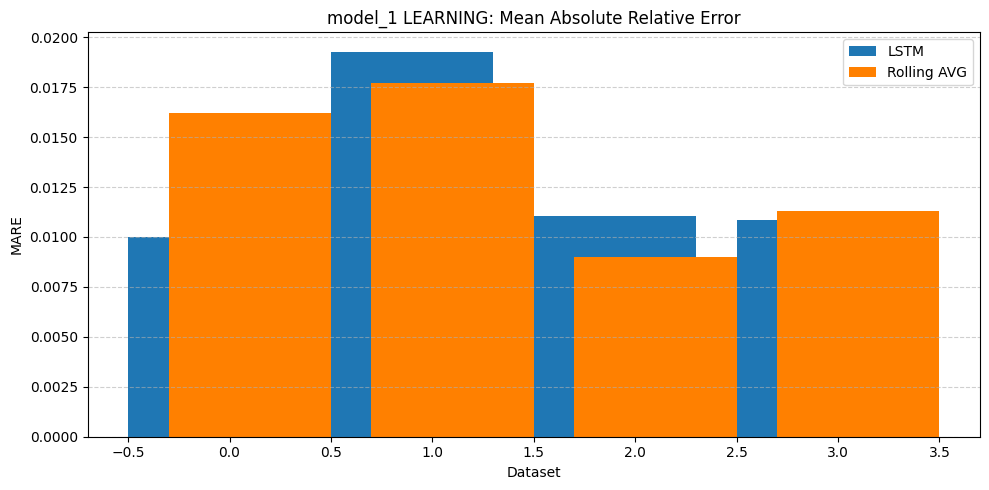

In [69]:
import numpy as np
file='/Users/ramanzatsarenko/smores_proj/out/crossval_100epochs_10runs_2025-11-06_11-31-57/metrics.csv'
def plot_l1loss_w_baselines(file1, learning_type, model):
    df1 = pd.read_csv(file1)
    df1 = df1.loc[df1['model'] == model]
    x = np.arange(len(df1['dataset'].unique()))
    offset = 0.2
    plt.figure(figsize=(10, 5))
    plt.bar(x - offset/2, df1['SmoothL1Loss()'], color='#1f77b4', label='LSTM')
    plt.bar(x + offset/2, df1['SmoothL1Loss()_baseline'], color="#ff8000", label='Rolling AVG')
    plt.title(f'{learning_type} LEARNING: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('L1 Smooth Loss')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_losses_w_baselines(file, 'model_1', 'model_1')

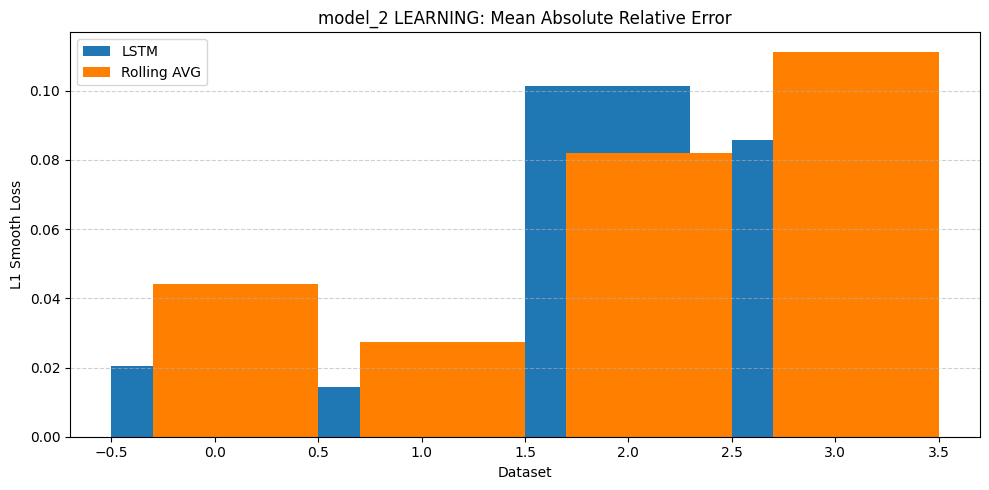

In [70]:
plot_l1loss_w_baselines(file, 'model_2', 'model_2')

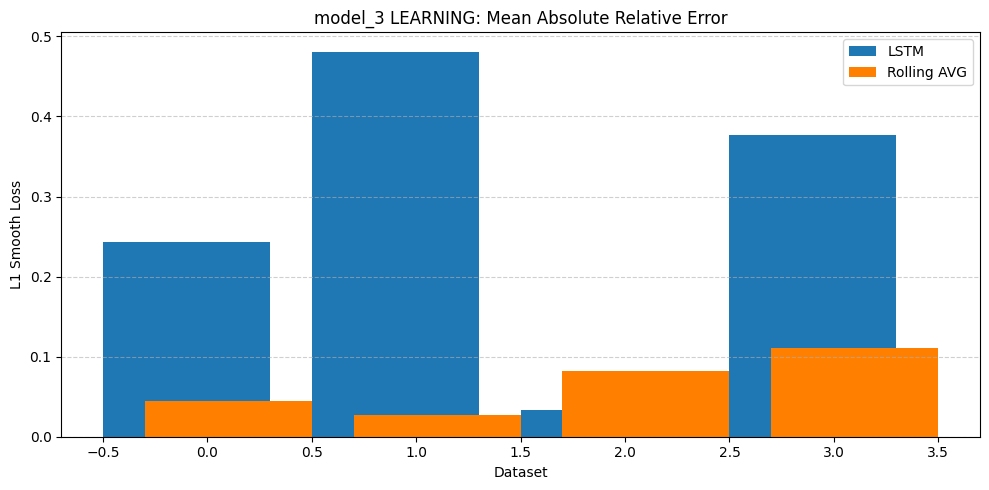

In [71]:
plot_l1loss_w_baselines(file, 'model_3', 'model_3')

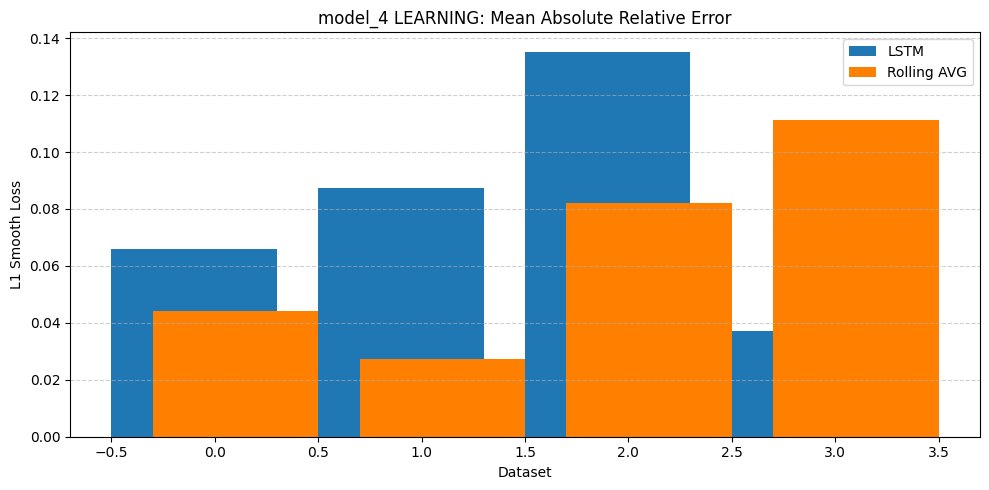

In [72]:
plot_l1loss_w_baselines(file, 'model_4', 'model_4')

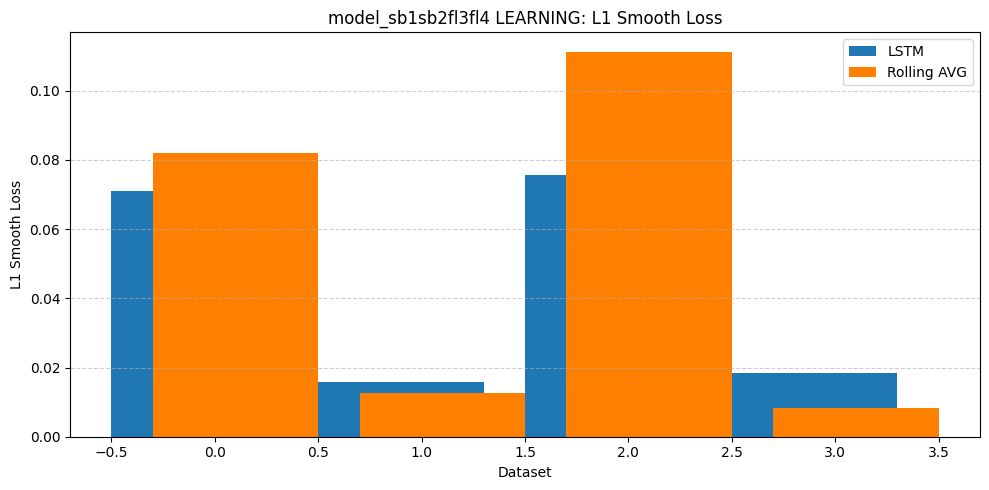

In [73]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_12-06-16/metrics.csv'
def plot_l1loss_w_baselines(file1, learning_type, model):
    df1 = pd.read_csv(file1)
    df1 = df1.loc[df1['model'] == model]
    x = np.arange(len(df1['dataset'].unique()))
    offset = 0.2
    plt.figure(figsize=(10, 5))
    plt.bar(x - offset/2, df1['SmoothL1Loss()'], color='#1f77b4', label='LSTM')
    plt.bar(x + offset/2, df1['SmoothL1Loss()_baseline'], color="#ff8000", label='Rolling AVG')
    plt.title(f'{learning_type} LEARNING: L1 Smooth Loss')
    plt.xlabel('Dataset')
    plt.ylabel('L1 Smooth Loss')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_l1loss_w_baselines(file, 'model_sb1sb2fl3fl4', 'model_sb1sb2fl3fl4')

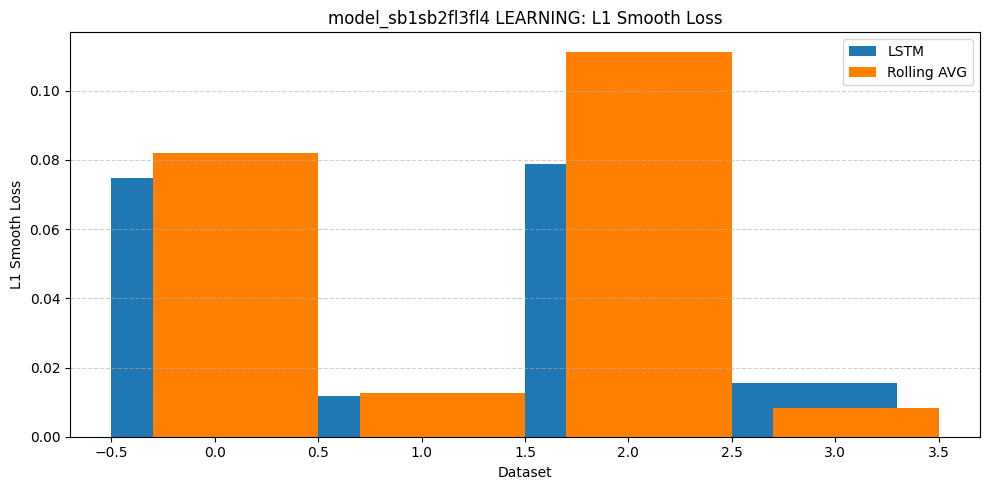

In [74]:
file = '/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_12-41-28/metrics.csv'
plot_l1loss_w_baselines(file, 'model_sb1sb2fl3fl4', 'model_sb1sb2fl3fl4')

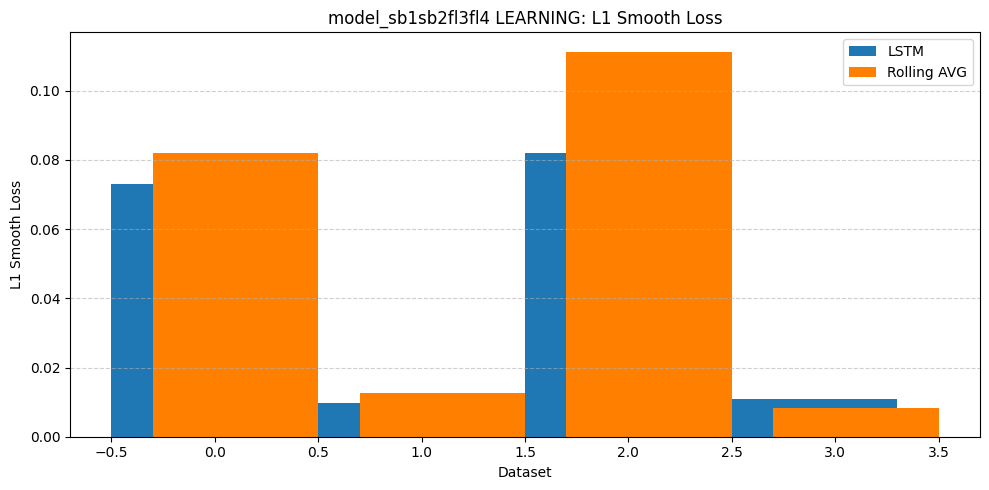

In [75]:
file = '/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_12-48-34/metrics.csv'
plot_l1loss_w_baselines(file, 'model_sb1sb2fl3fl4', 'model_sb1sb2fl3fl4')

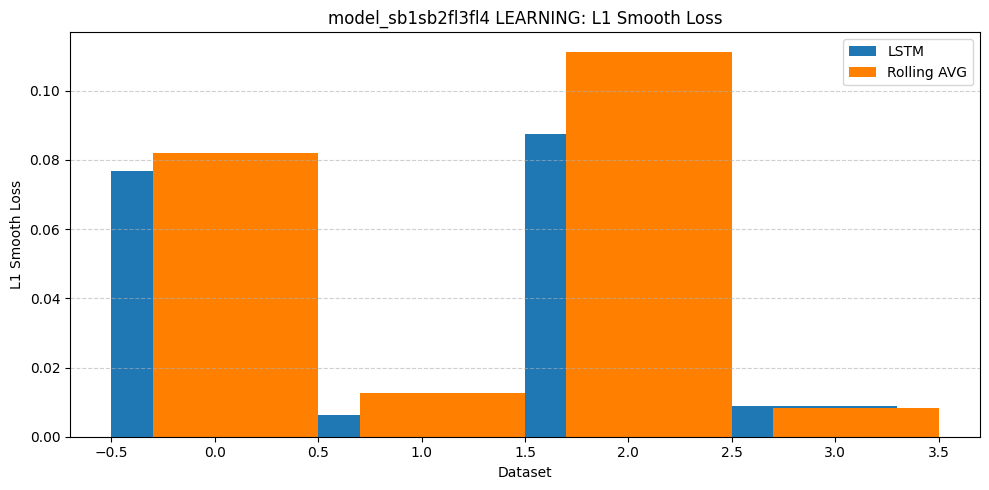

In [76]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_13-13-22/metrics.csv'
plot_l1loss_w_baselines(file, 'model_sb1sb2fl3fl4', 'model_sb1sb2fl3fl4')

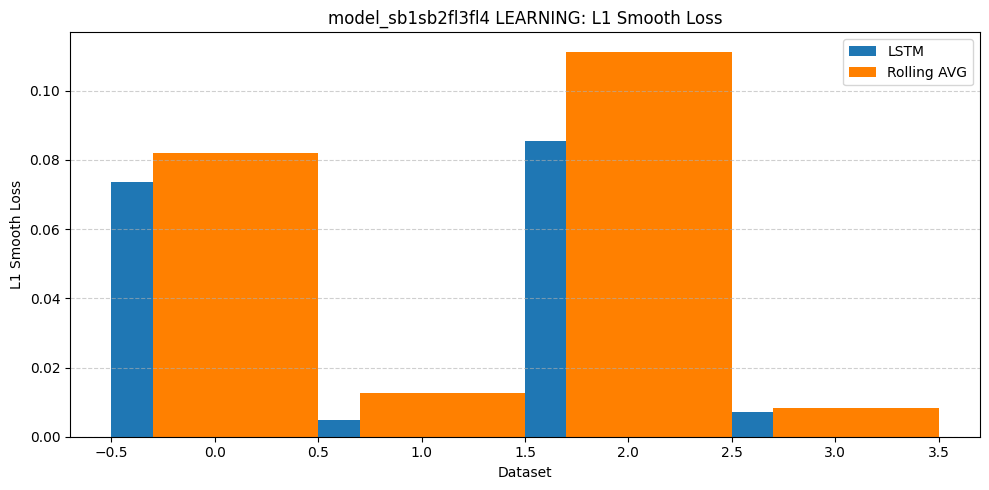

In [77]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_13-21-18/metrics.csv'
plot_l1loss_w_baselines(file, 'model_sb1sb2fl3fl4', 'model_sb1sb2fl3fl4')

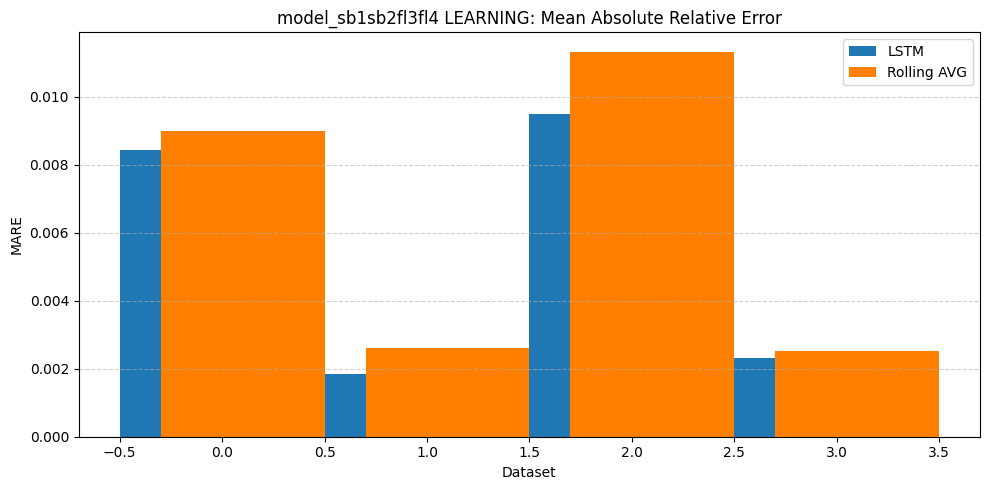

In [78]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_13-21-18/metrics.csv'
plot_losses_w_baselines(file, 'model_sb1sb2fl3fl4', 'model_sb1sb2fl3fl4')

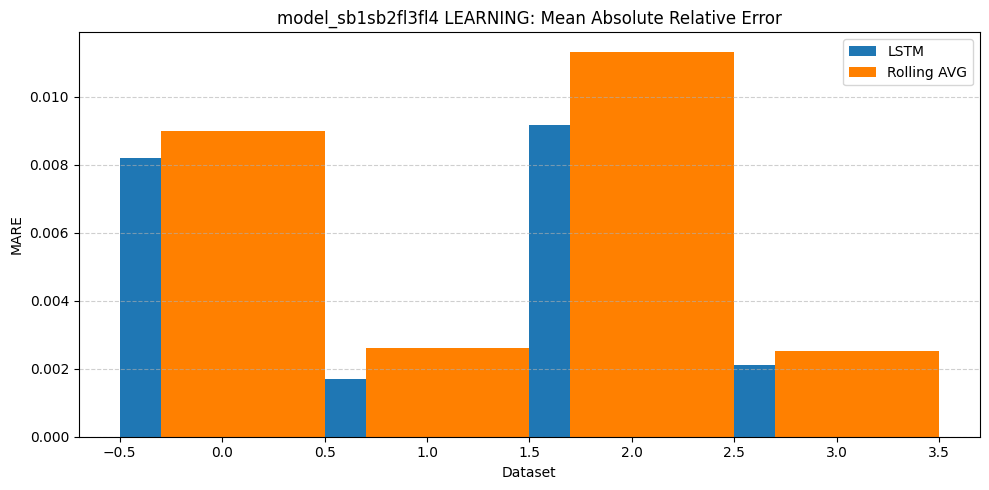

In [79]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_13-46-16/metrics.csv'
plot_losses_w_baselines(file, 'model_sb1sb2fl3fl4', 'model_sb1sb2fl3fl4')


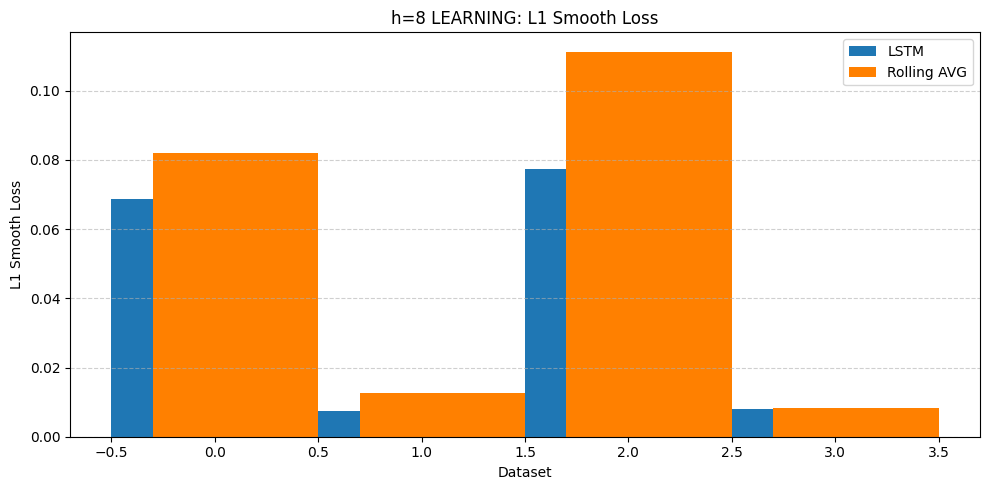

In [80]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_13-51-48/metrics.csv'
plot_l1loss_w_baselines(file, 'h=8', 'model_sb1sb2fl3fl4')

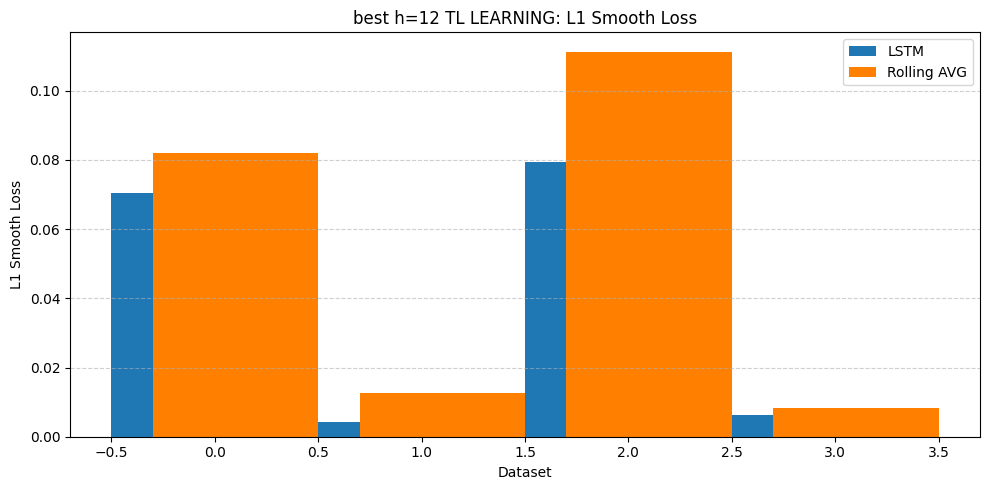

In [81]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_13-46-16/metrics.csv'
plot_l1loss_w_baselines(file,'best h=12 TL', 'model_sb1sb2fl3fl4')

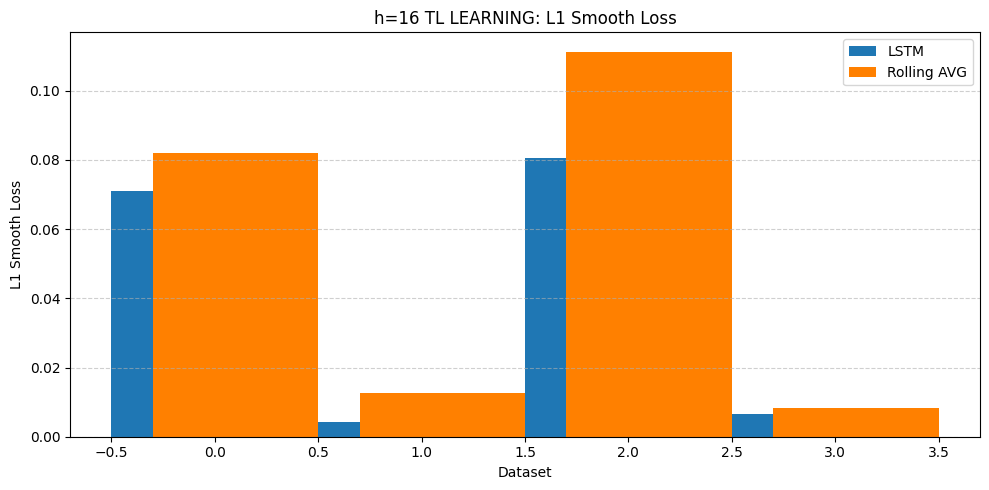

In [82]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_14-00-22/metrics.csv'
plot_l1loss_w_baselines(file,'h=16 TL', 'model_sb1sb2fl3fl4')

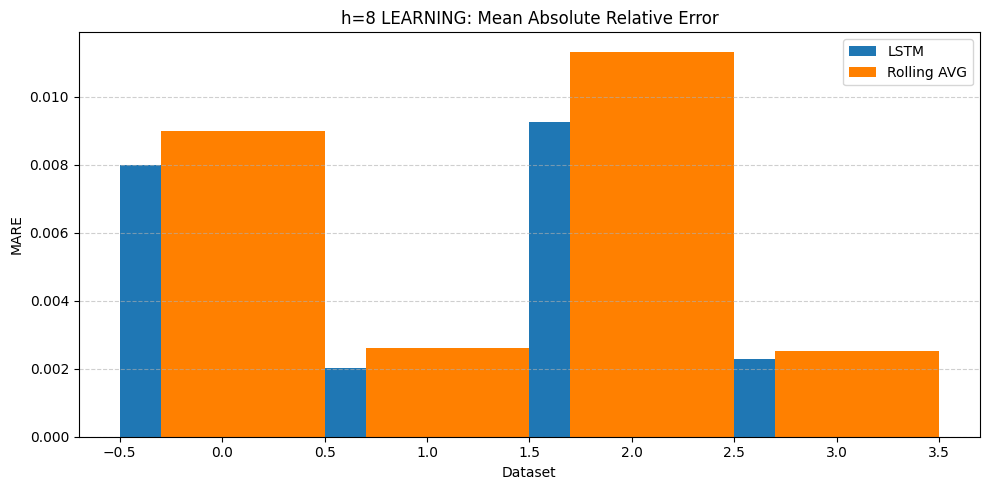

In [83]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_13-51-48/metrics.csv'
plot_losses_w_baselines(file, 'h=8', 'model_sb1sb2fl3fl4')

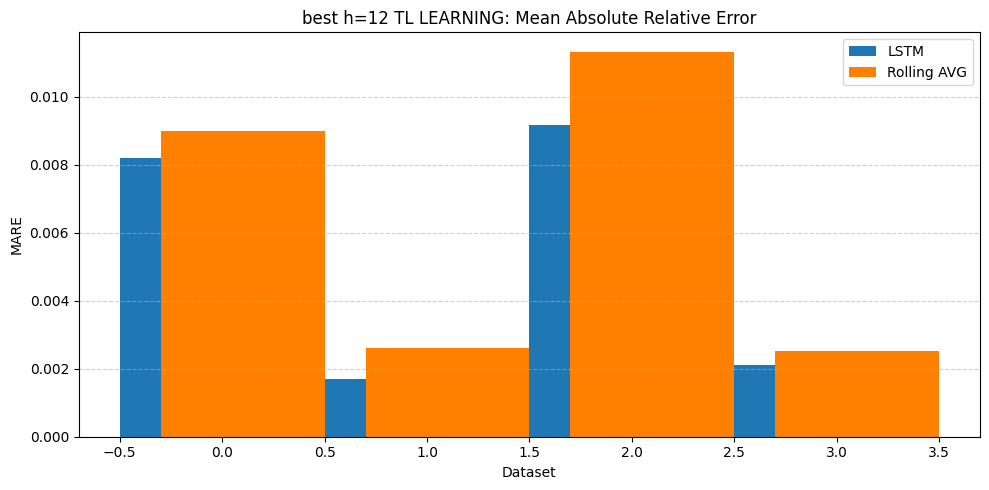

In [84]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_13-46-16/metrics.csv'
plot_losses_w_baselines(file,'best h=12 TL', 'model_sb1sb2fl3fl4')

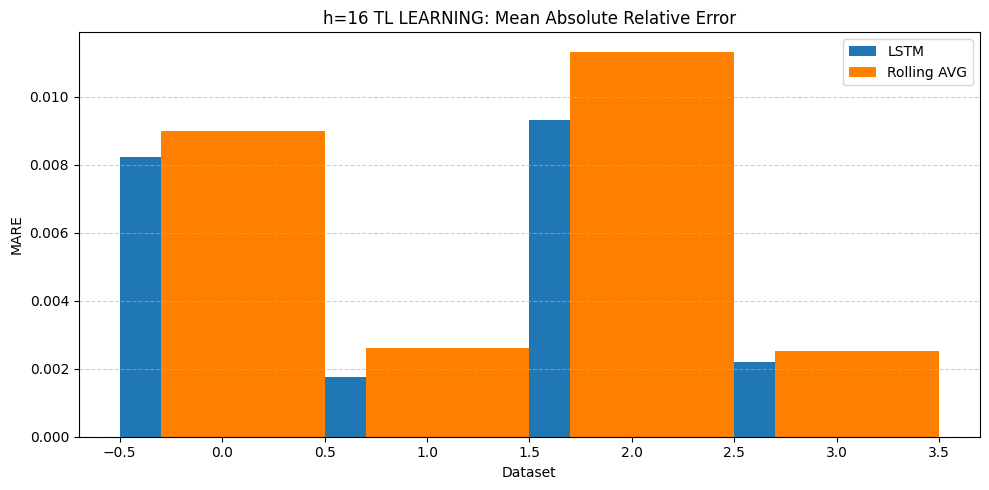

In [85]:
file='/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-07_14-00-22/metrics.csv'
plot_losses_w_baselines(file,'h=16 TL', 'model_sb1sb2fl3fl4')

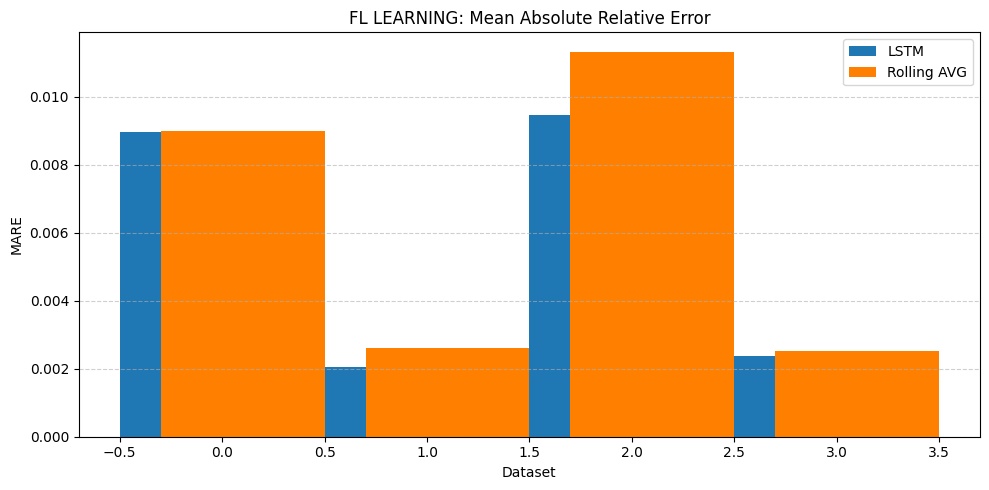

In [86]:
file='/Users/ramanzatsarenko/smores_proj/out/Fl_100epochs_10runs_2025-11-10_13-24-11/metrics.csv'
plot_losses_w_baselines(file,'FL', 'model_FL_sb1sb2fl3fl4')

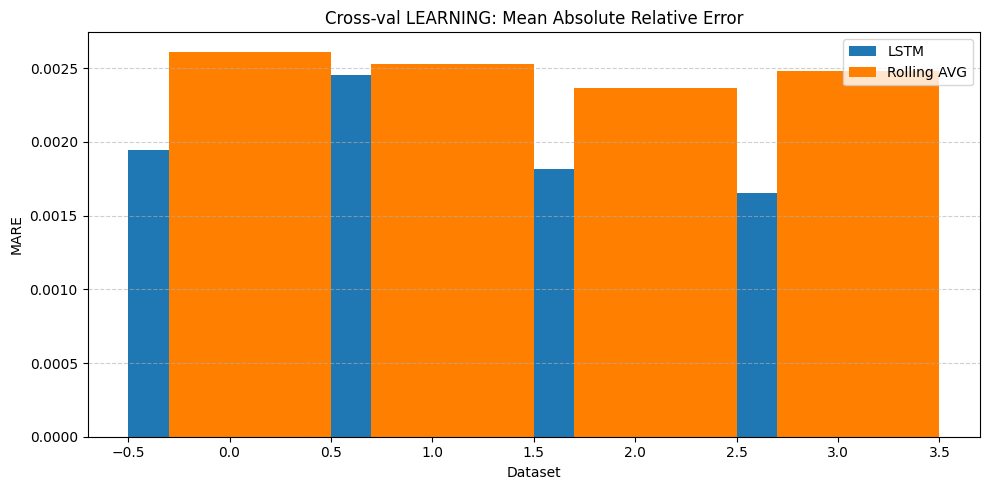

In [87]:
file='/Users/ramanzatsarenko/smores_proj/out/crossval_SB_FL_100epochs_1runs_2025-11-10_13-36-51/metrics.csv'
plot_losses_w_baselines(file,'Cross-val', 'model_2')

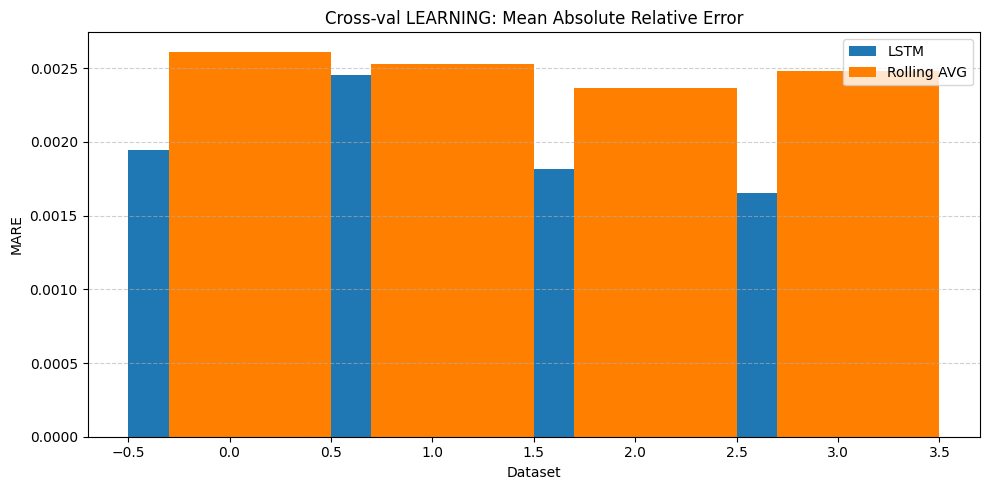

In [88]:
file='/Users/ramanzatsarenko/smores_proj/out/crossval_SB_FL_100epochs_1runs_2025-11-10_14-24-09/metrics.csv'
plot_losses_w_baselines(file,'Cross-val', 'model_2')

In [89]:
def plot_losses_florida_all_train_methods(file_crossval, file_tl, file_fl, learning_type, model_crossval, model_TL, model_FL,
                                          datasets=['fl_dataset1']):
    df1 = pd.read_csv(file_crossval)
    df2 = pd.read_csv(file_tl)
    df3 = pd.read_csv(file_fl)
    df1 = df1.loc[(df1['model'] == model_crossval) & (df1['dataset'].isin(datasets))]
    df2 = df2.loc[(df2['model'] == model_TL) & (df2['dataset'].isin(datasets))]
    df3 = df3.loc[(df3['model'] == model_FL) & (df3['dataset'].isin(datasets))]
    x = np.arange(len(df1['dataset'].unique()))
    offset = 0.2
    plt.figure(figsize=(16, 5))
    plt.bar('crossval', df1['MARE'], color='#1f77b4', label='LSTM crossval')
    plt.bar('TL', df2['MARE'], color="#21c400", label='LSTM TL')
    plt.bar('FL', df3['MARE'], color="#b41f1f", label='LSTM FL')
    plt.bar('rolling avg', df1['MARE_baseline'], color="#ff8000", label='Rolling AVG')
    plt.title(f'{learning_type} LEARNING: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('MARE')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

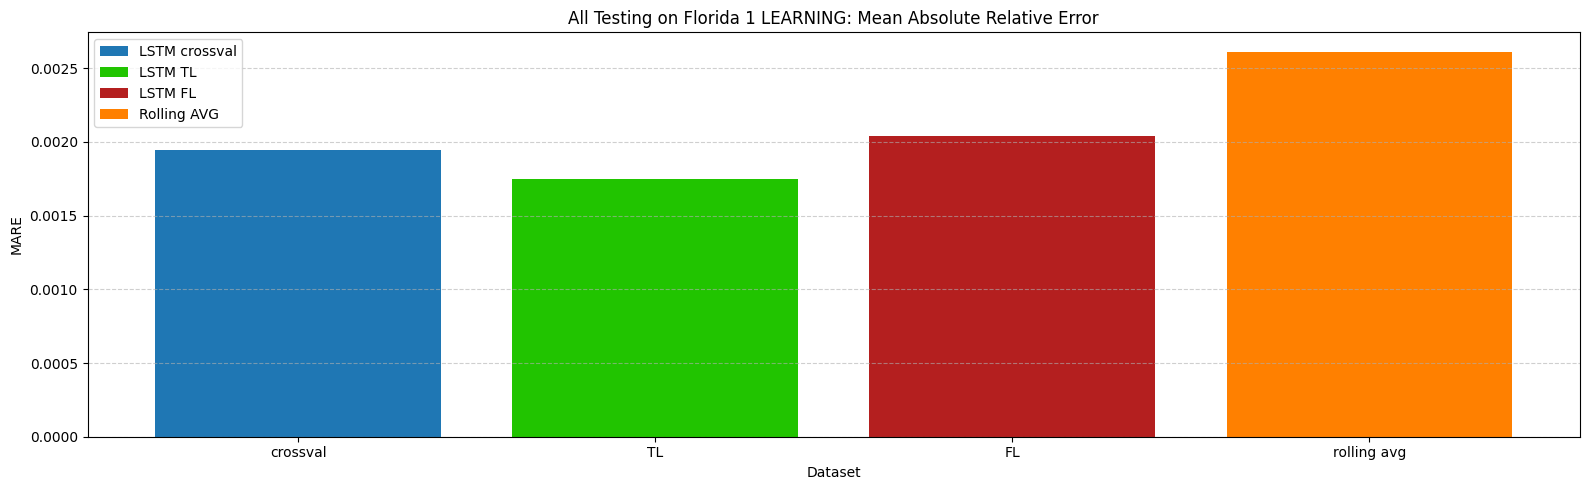

In [90]:
tl_f = '/Users/ramanzatsarenko/smores_proj/out/tl_sbfl_100epochs_1runs_2025-11-10_12-10-58/metrics.csv'
fl_f = '/Users/ramanzatsarenko/smores_proj/out/Fl_100epochs_10runs_2025-11-10_13-24-11/metrics.csv'
crossval_f = '/Users/ramanzatsarenko/smores_proj/out/crossval_SB_FL_100epochs_1runs_2025-11-10_14-24-09/metrics.csv'

plot_losses_florida_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Florida 1', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4')

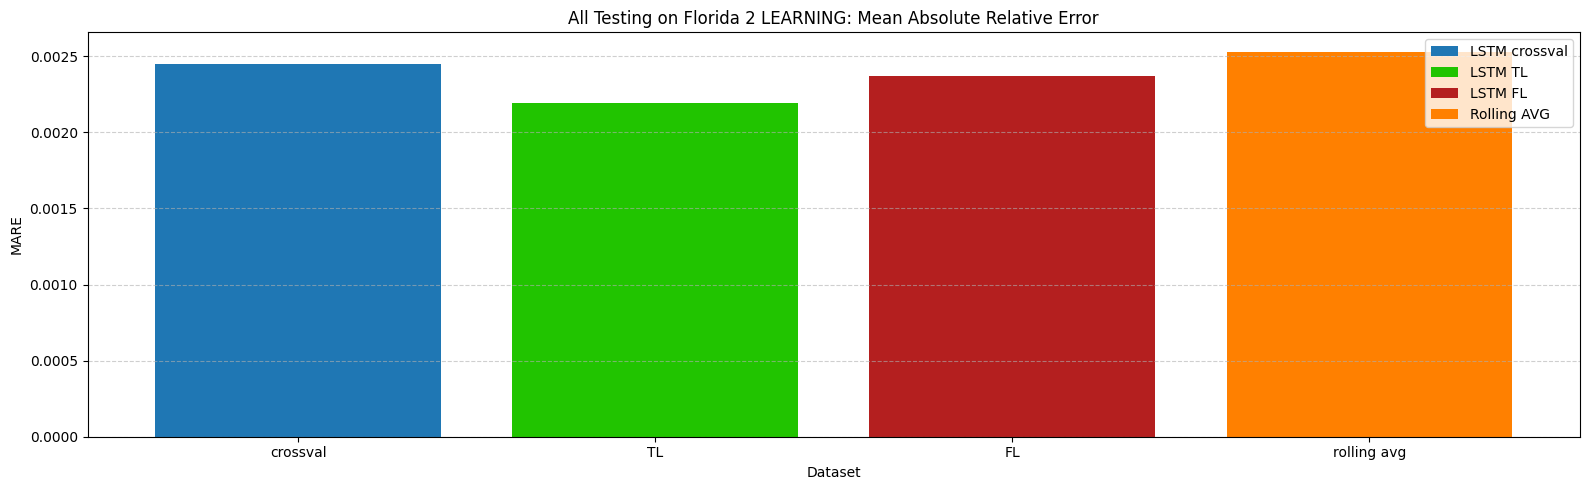

In [91]:
plot_losses_florida_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Florida 2', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4', ['fl_dataset2'])

In [92]:
def plot_losses_sb_all_train_methods(file_crossval, file_tl, file_fl, learning_type, model_crossval, model_TL, model_FL,
                                          datasets=['sb_dataset3']):
    # df1 = pd.read_csv(file_crossval)
    df2 = pd.read_csv(file_tl)
    df3 = pd.read_csv(file_fl)
    # df1 = df1.loc[(df1['model'] == model_crossval) & (df1['dataset'].isin(datasets))]
    df2 = df2.loc[(df2['model'] == model_TL) & (df2['dataset'].isin(datasets))]
    df3 = df3.loc[(df3['model'] == model_FL) & (df3['dataset'].isin(datasets))]
    x = np.arange(len(df2['dataset'].unique()))
    offset = 0.2
    plt.figure(figsize=(16, 5))
    # plt.bar('crossval', df1['MARE'], color='#1f77b4', label='LSTM crossval')
    plt.bar('TL', df2['MARE'], color="#21c400", label='LSTM TL')
    plt.bar('FL', df3['MARE'], color="#b41f1f", label='LSTM FL')
    # plt.bar('rolling avg', df1['MARE_baseline'], color="#ff8000", label='Rolling AVG')
    plt.title(f'{learning_type} LEARNING: Mean Absolute Relative Error')
    plt.xlabel('Dataset')
    plt.ylabel('MARE')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

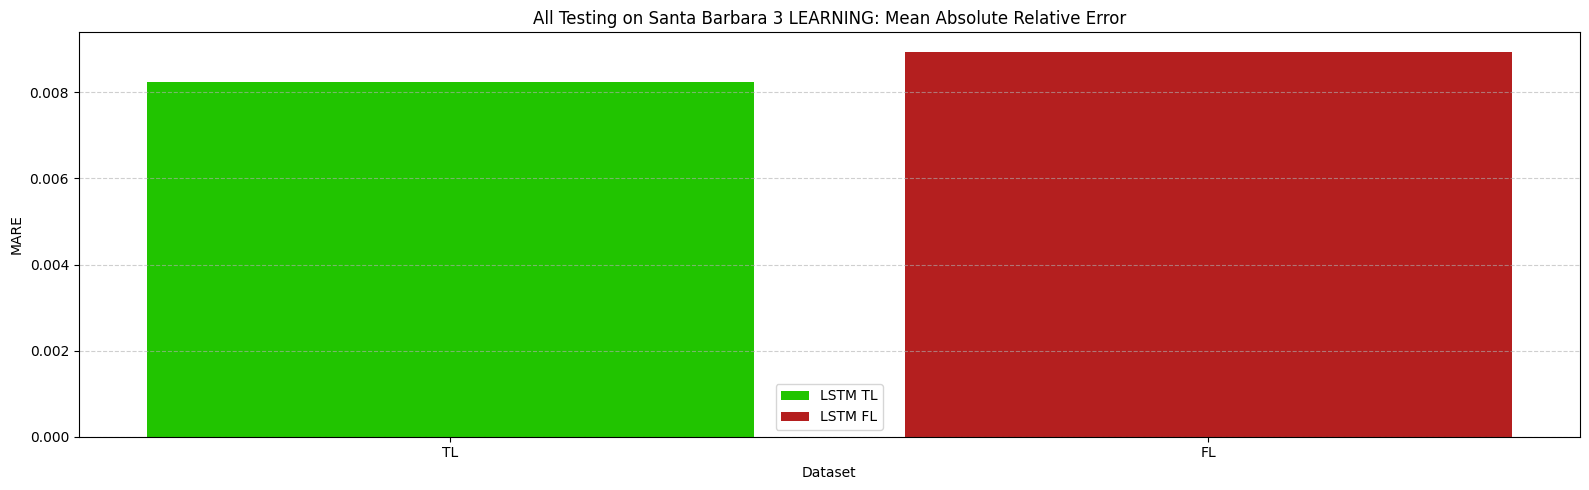

In [93]:
plot_losses_sb_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Santa Barbara 3', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4')

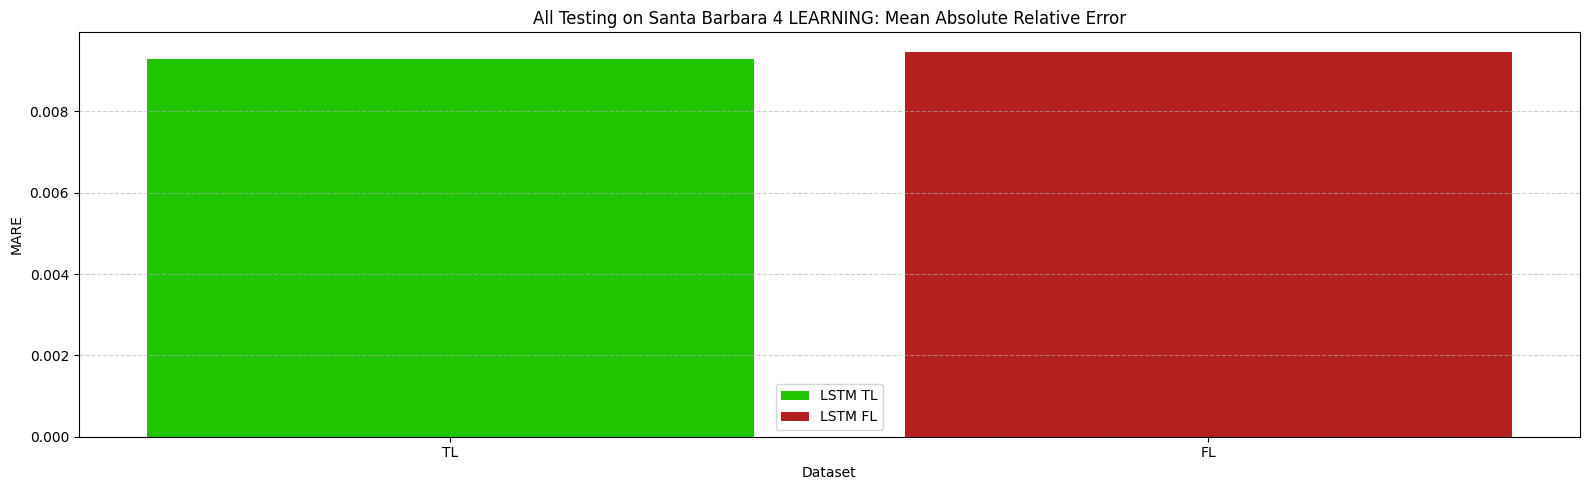

In [94]:
plot_losses_sb_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Santa Barbara 4', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4', ['sb_dataset4'])

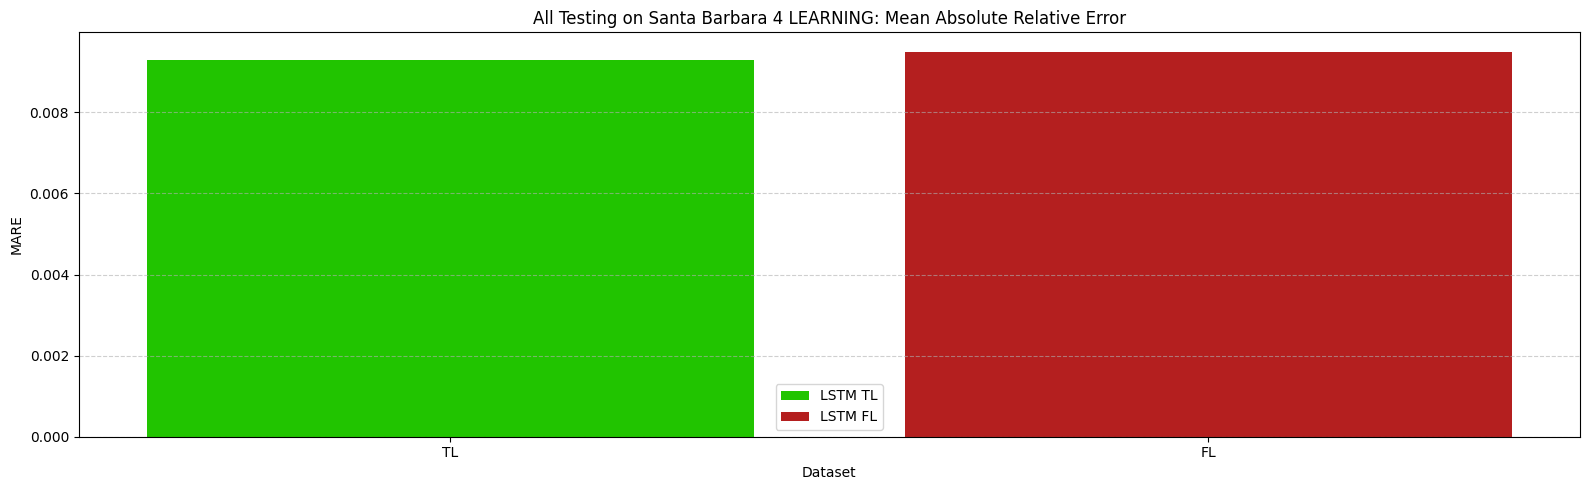

In [99]:
fl_f = '/Users/ramanzatsarenko/smores_proj/out/Fl_100epochs_10runs_2026-01-07_10-23-07/metrics.csv'
plot_losses_sb_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Santa Barbara 4', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4', ['sb_dataset4'])

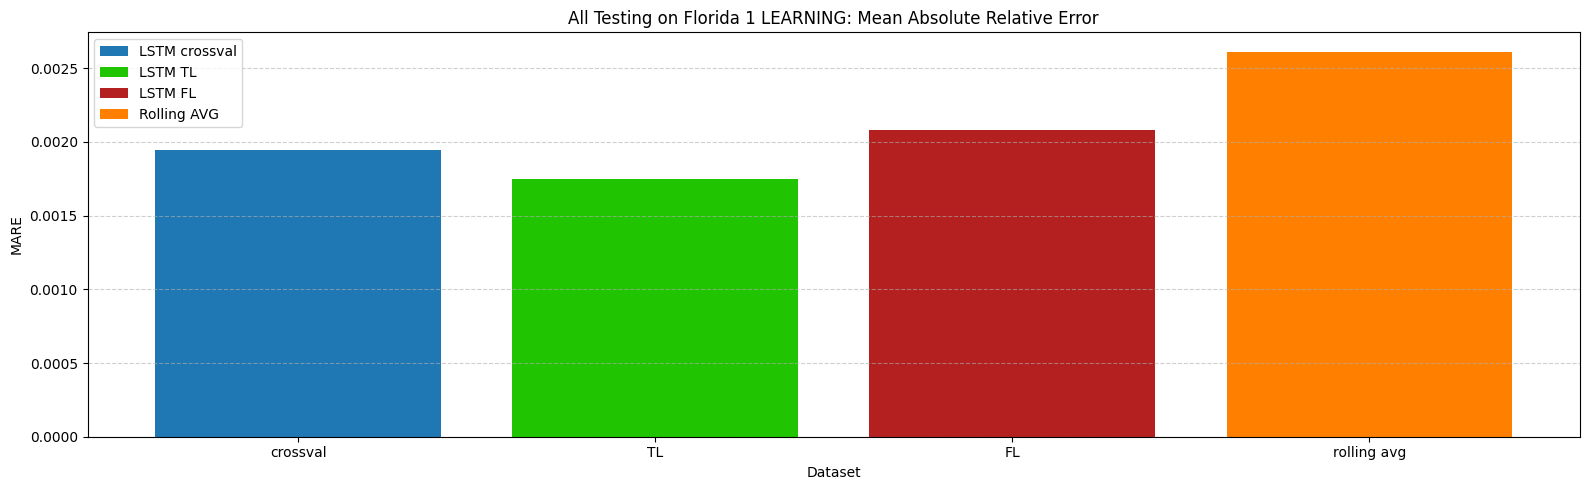

In [100]:

plot_losses_florida_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Florida 1', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4')

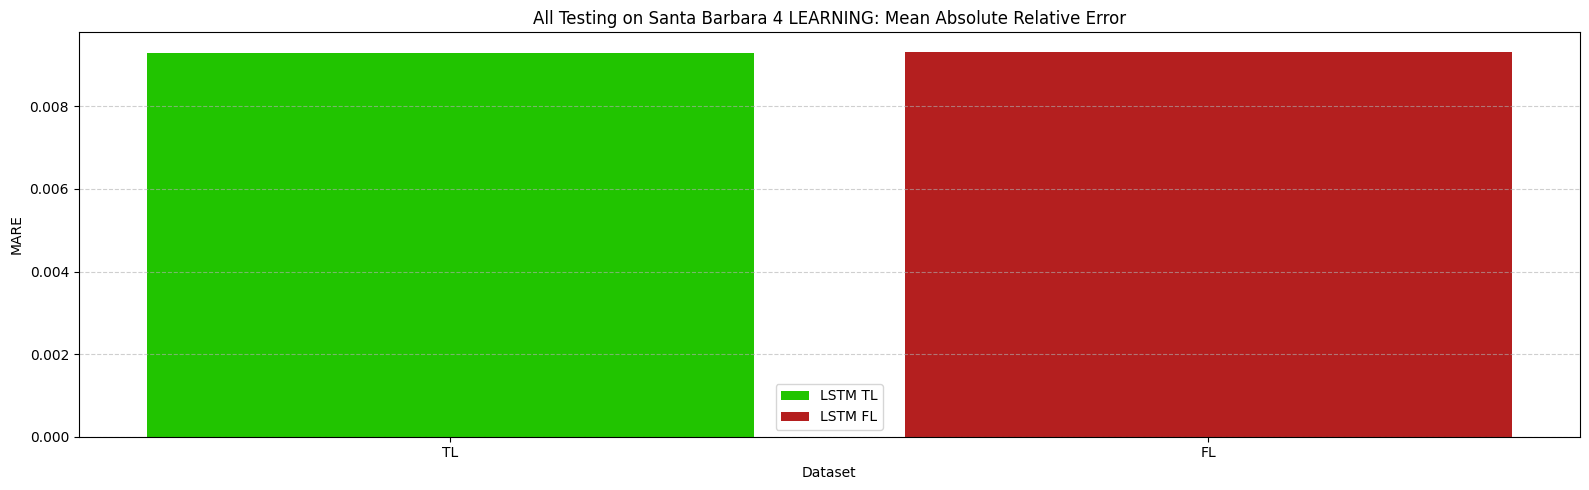

In [101]:
fl_f = '/Users/ramanzatsarenko/smores_proj/out/Fl_100epochs_10runs_2026-01-07_10-30-41/metrics.csv'
plot_losses_sb_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Santa Barbara 4', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4', ['sb_dataset4'])

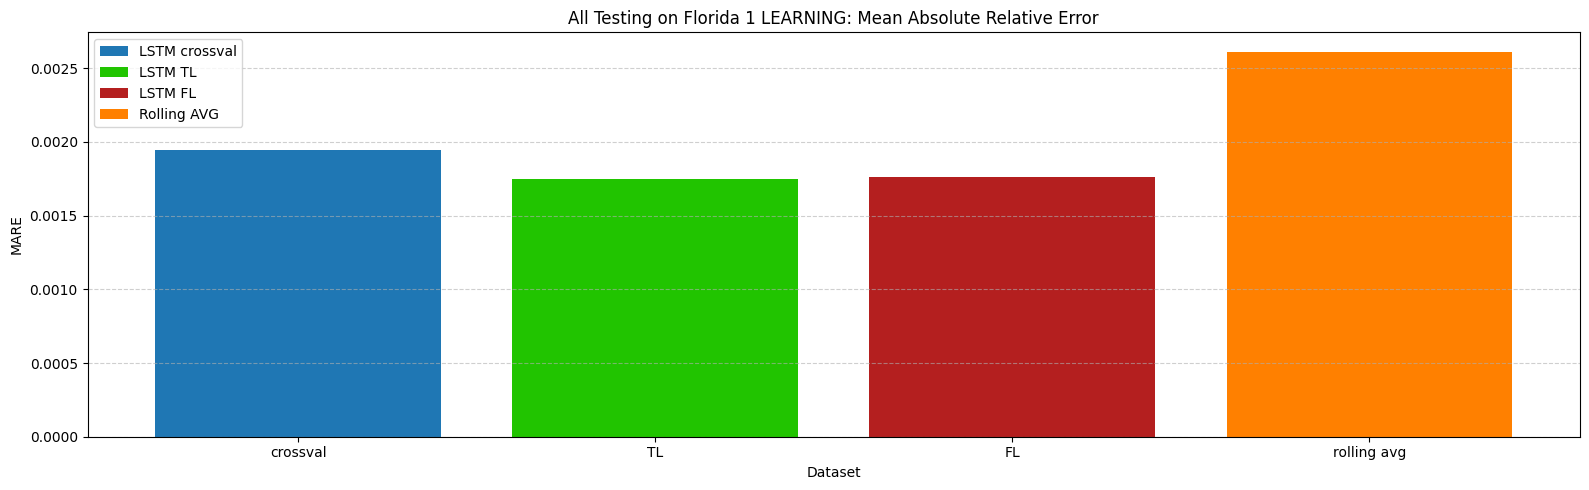

In [102]:
plot_losses_florida_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Florida 1', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4')

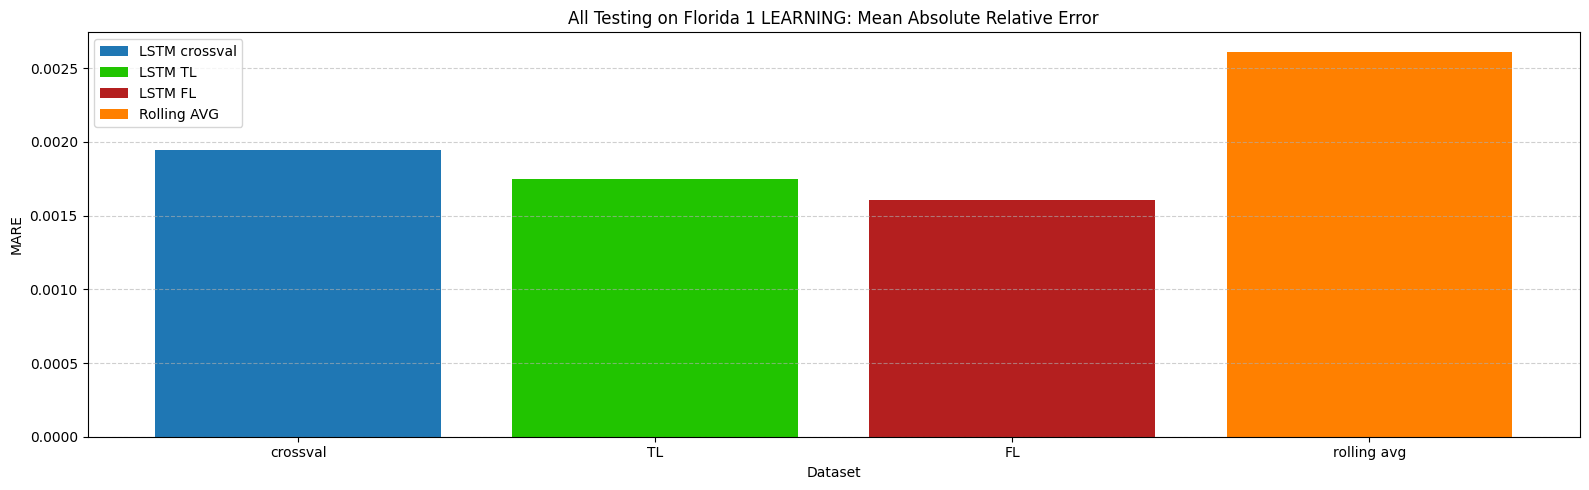

In [103]:
fl_f = '/Users/ramanzatsarenko/smores_proj/out/Fl_100epochs_10runs_2026-01-07_10-36-30/metrics.csv'
plot_losses_florida_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Florida 1', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4')


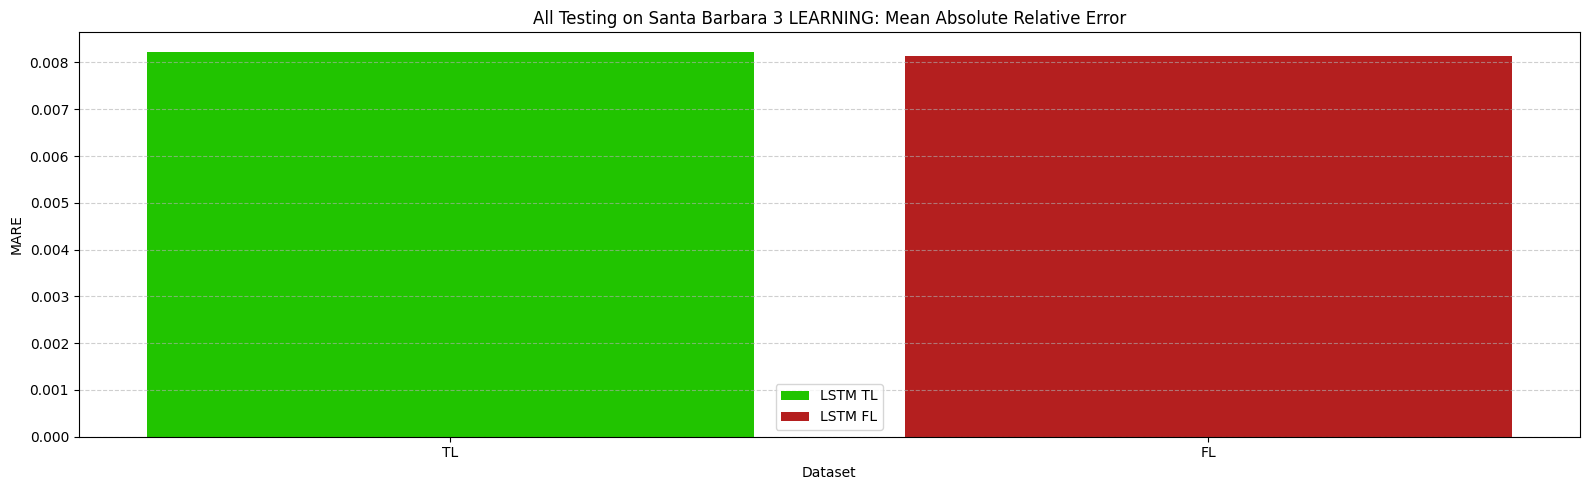

In [104]:
plot_losses_sb_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Santa Barbara 3', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4')

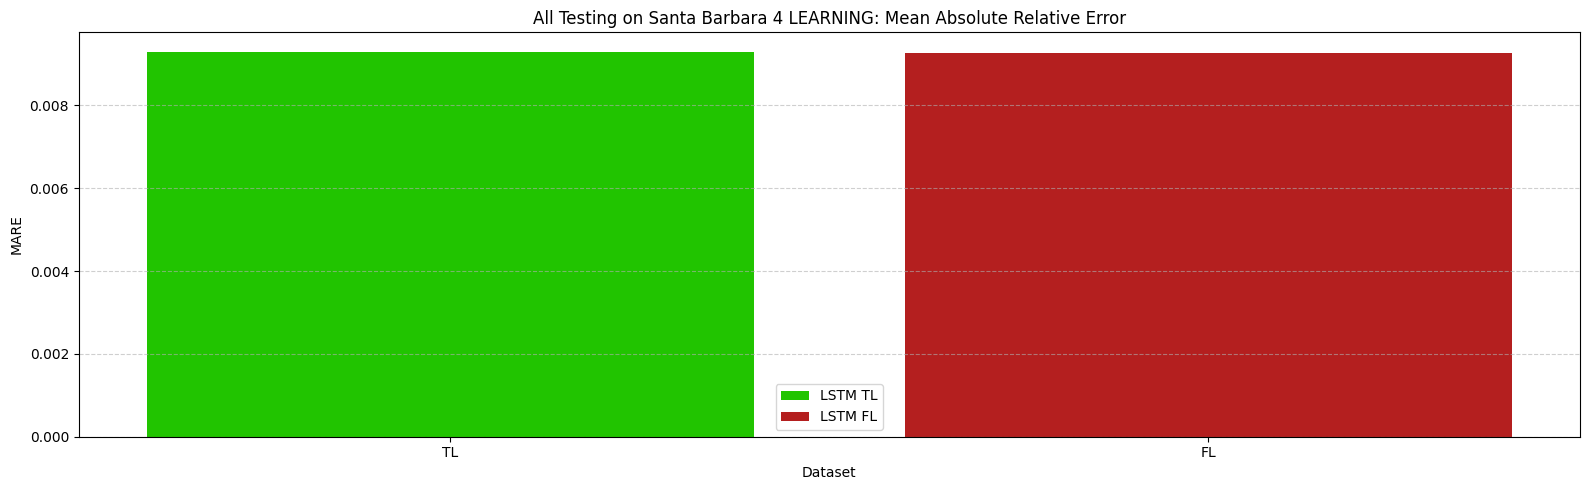

In [105]:
plot_losses_sb_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Santa Barbara 4', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4', ['sb_dataset4'])

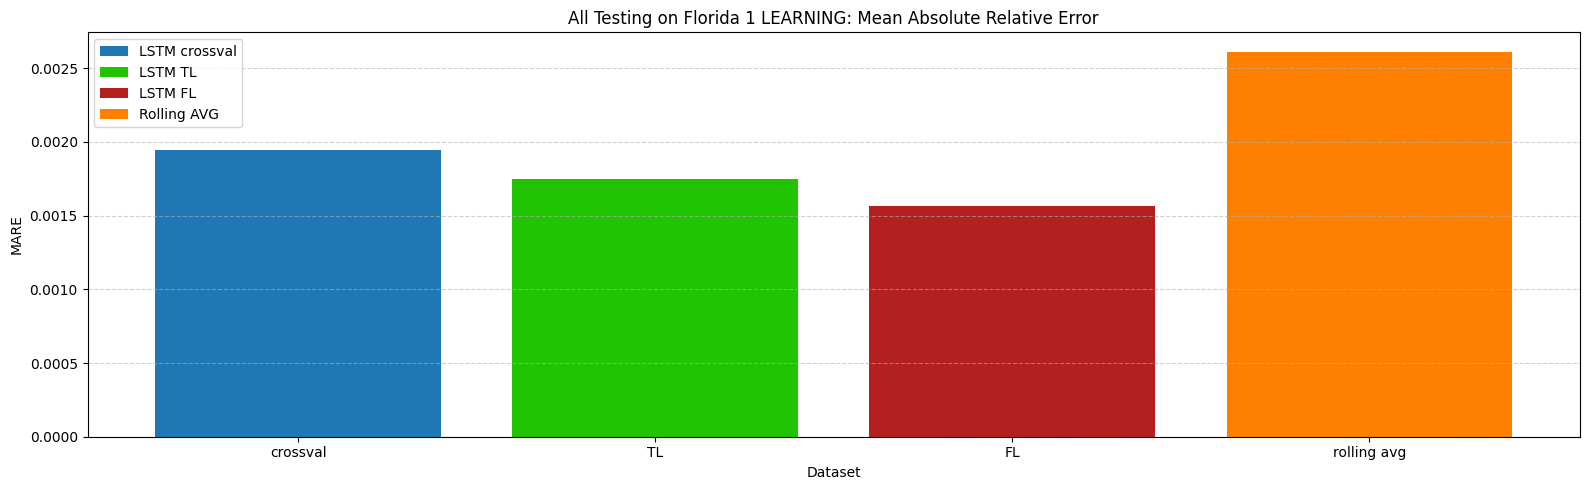

In [106]:
fl_f = '/Users/ramanzatsarenko/smores_proj/out/Fl_100epochs_10runs_2026-01-07_12-09-37/metrics.csv'
plot_losses_florida_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Florida 1', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4')

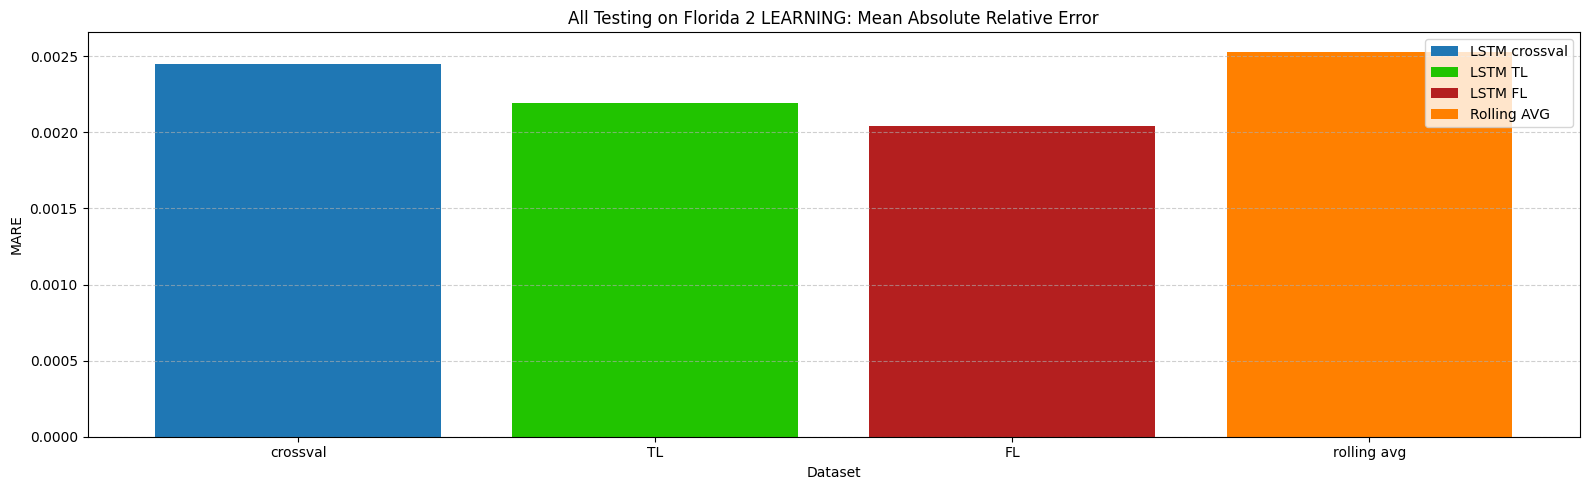

In [107]:
plot_losses_florida_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Florida 2', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4', ['fl_dataset2'])

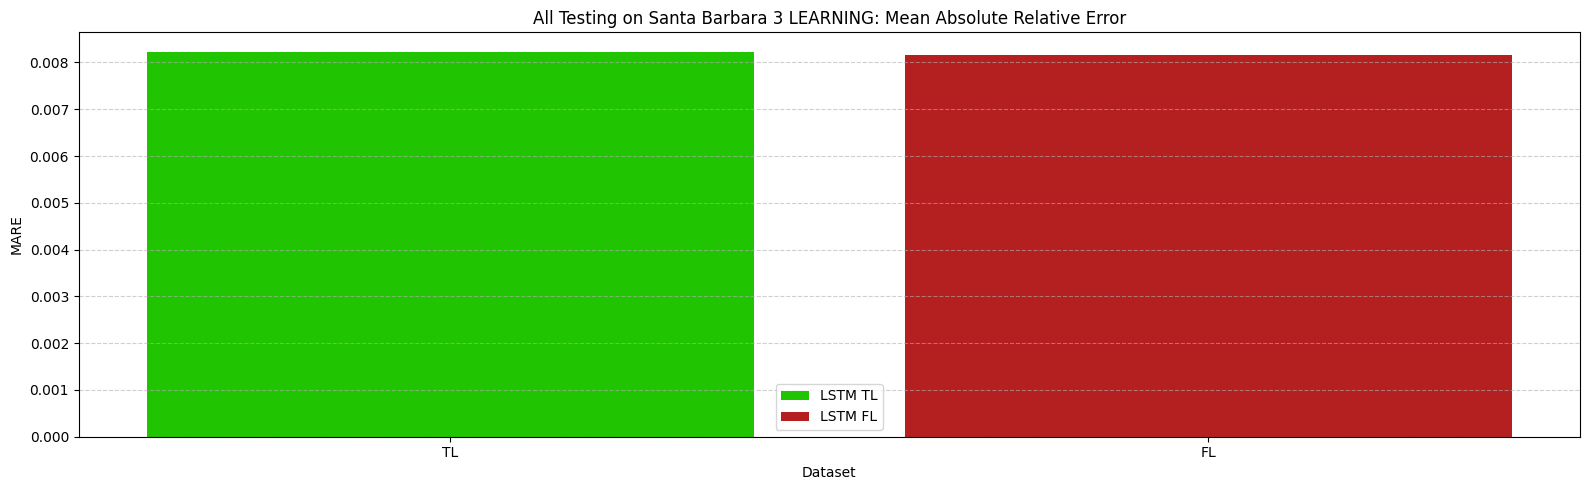

In [108]:
plot_losses_sb_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Santa Barbara 3', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4')

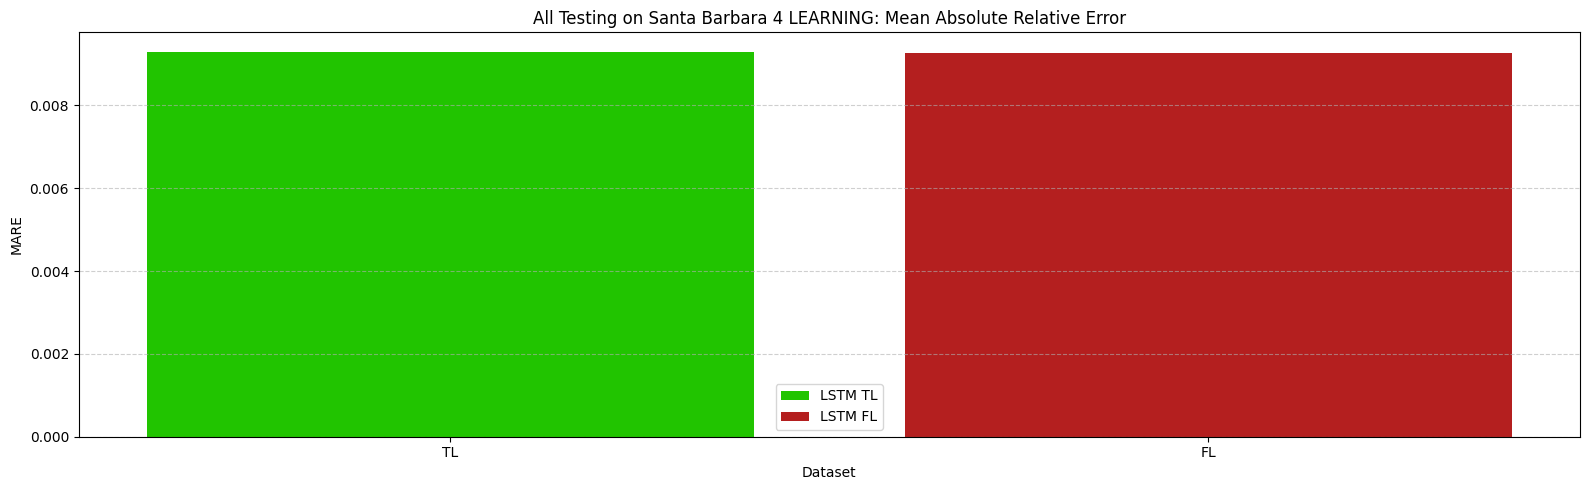

In [109]:
plot_losses_sb_all_train_methods(crossval_f, tl_f, fl_f, 'All Testing on Santa Barbara 4', 'model_2', 'model_sb1sb2fl3fl4', 'model_FL_sb1sb2fl3fl4', ['sb_dataset4'])